# Introduction to Random Forest Classifiers

A Random Forest Classifier is an ensemble method which means that its final output is a result of multiple different algorithms and therefore uses the logic of the crowd is more accurate than the individual. For this, it uses the Decision Tree Classifier that we encountered last seminar, creating multiple trees that work on subest of the data and aggregating the final result in creating predictions. 

The advantages of this method are that:
- Easy to understand 
- You can extract the structure by looking at individual trees
- Able to hand numerical and categorical data
- Reduces variance by combing diverse trees

The disadvantages:
- A large number of trees can make the algorithm too slow for real-time predictions in some cases

So you can see that it is highly useful with limited downside.


## The Data

The data that we will be looking at is the 2018-2019 NBA season and seeing if we can correctly classify each player into their listed position. This includes: PG, SG, SF, PF and C.

Therefore first of all we need to load in the data and inspect it.

In [1]:
import pandas as pd

NBA = pd.read_csv("Data/NBA_tot.txt", sep=",", header = 0)

We want to see what columns are contained within the data so that we can remove any values that aren't necessary

In [2]:
print(NBA.columns.values)

['Rk' 'Player' 'Pos' 'Age' 'Tm' 'G' 'GS' 'MP' 'FG' 'FGA' 'FG%' '3P' '3PA'
 '3P%' '2P' '2PA' '2P%' 'eFG%' 'FT' 'FTA' 'FT%' 'ORB' 'DRB' 'TRB' 'AST'
 'STL' 'BLK' 'TOV' 'PF' 'PTS']


In this case we can drop the `Rk`, `Age`, `Tm`, `GS` ase these are not expected to be related to position and thus are not important going forward.

In [3]:
NBA.drop(columns =["Rk", "Age", "Tm", "GS"], inplace=True)

We then want to consider our target variable and how that is distributed and whether there may be any issues. We do this through a bar plot as we know that it is a discrete variable that takes on given categories.


Text(0, 0.5, 'Position')

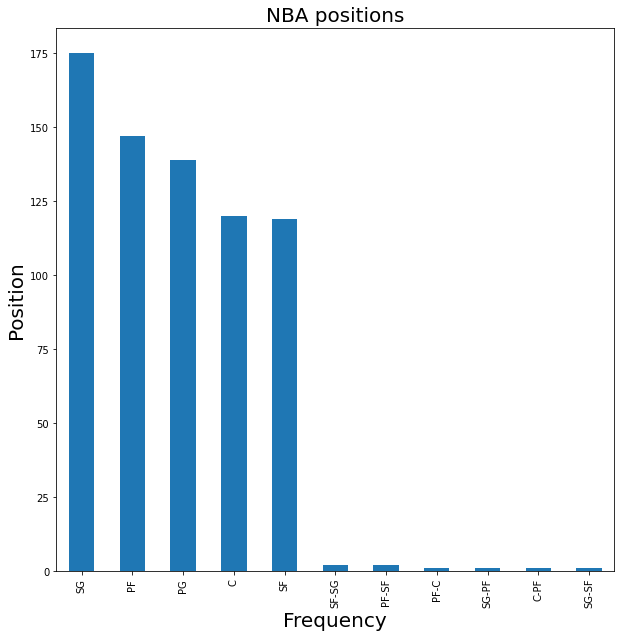

In [4]:
import matplotlib.pyplot as plt


pos = NBA.Pos.value_counts()
plt.subplots(figsize=(10, 10))
pos.plot(kind="bar")
plt.title("NBA positions", fontsize=20 )
plt.xlabel("Frequency", fontsize =20)
plt.ylabel("Position", fontsize=20 )

From this we can see that while SG, PF, PG, C and SF are all represented we have a few instances of players having two positions. The fact that these are so small means that we could potentially leave them out and drop them, but in our case we will try to clean them up on the basis that the first position identified will be their primary position.

We must thus inspect these outliers to see how appear.

In [5]:
NBA[NBA.Pos.isin(["PF-SF", "SF-SG","SG-PF","SG-SF", "PF-C", "C-PF"])]

,Player,Pos,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
38,Harrison Barnes\barneha02,PF-SF,77,2533,431,1027,0.420,174,441,0.395,...,0.824,57,304,361,115,50,13,98,122,1265
102,Jimmy Butler\butleji01,SF-SG,65,2185,418,904,0.462,67,193,0.347,...,0.855,121,221,342,263,123,39,95,111,1215
128,Wilson Chandler\chandwi01,PF-SF,51,1177,114,273,0.418,59,158,0.373,...,0.720,48,167,215,82,25,21,46,123,305
378,Kyle Korver\korveky01,SG-PF,70,1334,201,483,0.416,138,348,0.397,...,0.822,9,153,162,81,25,12,59,106,600
426,Thon Maker\makerth01,C-PF,64,972,109,268,0.407,49,153,0.320,...,0.667,41,161,202,45,21,51,33,105,323
436,Wesley Matthews\matthwe02,SF-SG,69,2091,279,698,0.400,150,403,0.372,...,0.810,32,138,170,160,54,17,91,160,840
600,Jonathon Simmons\simmojo02,SG-SF,56,1064,133,350,0.380,28,104,0.269,...,0.742,27,99,126,128,29,15,68,89,366
611,Jason Smith\smithja02,PF-C,20,190,21,59,0.356,9,26,0.346,...,0.875,16,36,52,14,3,7,13,30,65


We can thus use the apply function to be able to alter these results so that they show their primary position.

In [6]:
NBA["Pos"]= NBA["Pos"].apply(lambda x: x.split("-")[0] if "-" in x else x)

And check the results to see how they are distributed, expecting that this won't be too different to the plot above but that the double positions will be removed.

Text(0, 0.5, 'Position')

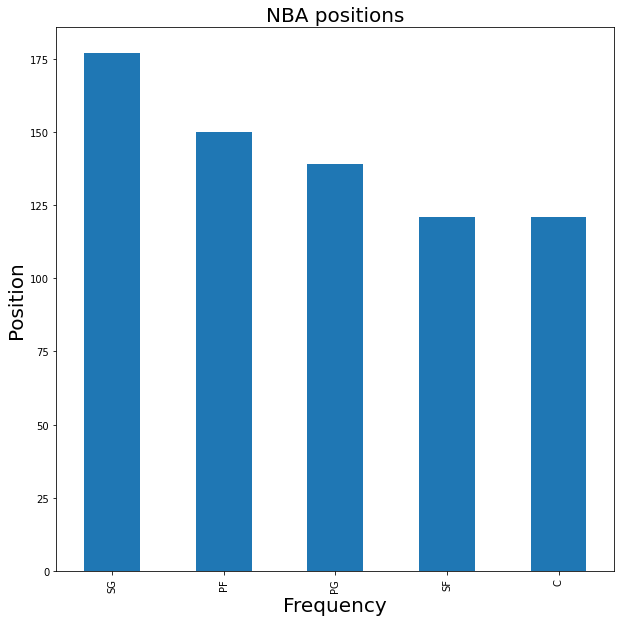

In [7]:
pos = NBA.Pos.value_counts()
plt.subplots(figsize=(10, 10))
pos.plot(kind="bar")
plt.title("NBA positions", fontsize=20 )
plt.xlabel("Frequency", fontsize =20)
plt.ylabel("Position", fontsize=20 )

In [8]:
duplicated_players = list(NBA[NBA.Player.duplicated(keep=False)].Player.unique())
print(len(duplicated_players))

86


In [9]:
print(NBA.columns.values)

['Player' 'Pos' 'G' 'MP' 'FG' 'FGA' 'FG%' '3P' '3PA' '3P%' '2P' '2PA'
 '2P%' 'eFG%' 'FT' 'FTA' 'FT%' 'ORB' 'DRB' 'TRB' 'AST' 'STL' 'BLK' 'TOV'
 'PF' 'PTS']


In [10]:
NBA.drop(columns = ["3P%", "2P%", "FT%", "eFG%", "FG%"], inplace = True)

In [11]:
not_sum = ["Player", "Pos"]
agg_fun = {x: "sum" for x in [y for y in list(NBA.columns.values) if y not in not_sum]}
agg_fun["Pos"] = "first"


NBA = NBA.groupby(["Player"]).agg(agg_fun).reset_index()

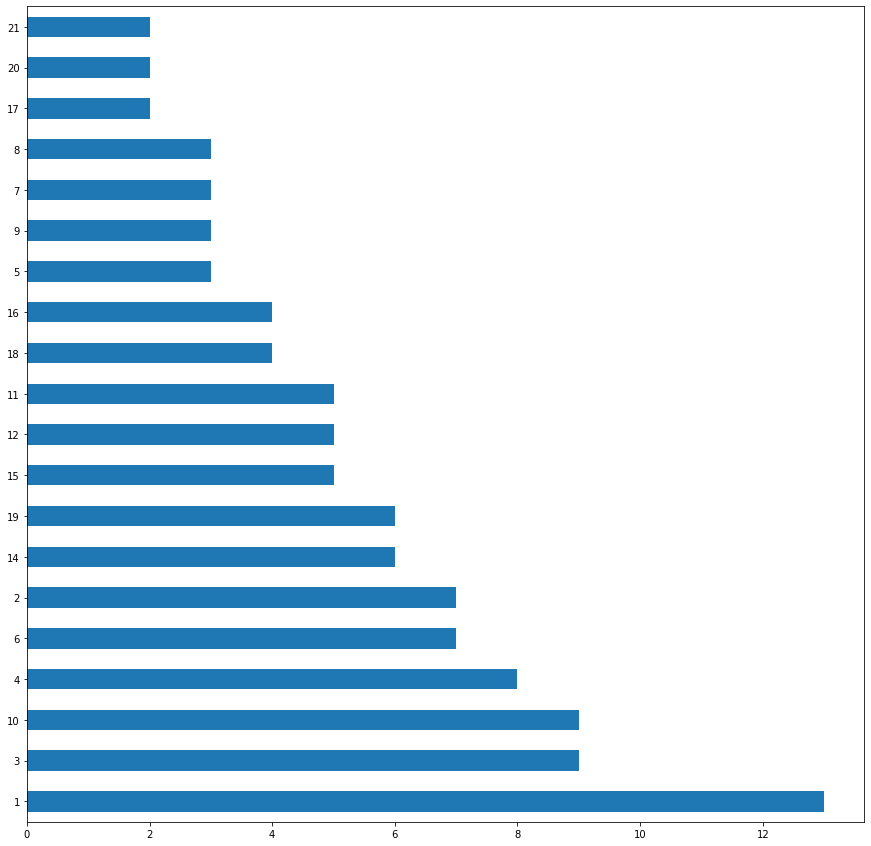

In [12]:
NBA[NBA.G <= 21].G.value_counts().plot(kind="barh", figsize=(15,15))

In [13]:
count = 0
half_games = dict(NBA[NBA.G <= 21].G.value_counts())
for x in half_games.values():
    count += x

print(count)

106


In [14]:
print(NBA.columns.values)

['Player' 'G' 'MP' 'FG' 'FGA' '3P' '3PA' '2P' '2PA' 'FT' 'FTA' 'ORB' 'DRB'
 'TRB' 'AST' 'STL' 'BLK' 'TOV' 'PF' 'PTS' 'Pos']


In [15]:
perc_cols = ["3P%", "2P%", "FT%", "FG%"]
for perc in perc_cols:
    made = str(perc[0:2])
    attempt = str(perc[0:2]) + "A"
    NBA[perc] = NBA[made]/NBA[attempt]

NBA["eFG%"] = (NBA["2P"] + 0.5*NBA["3P"])/NBA["FG"]

perc_cols.append("eFG%")

for x in perc_cols:
    NBA[x] = NBA[x].fillna(0)

Text(0, 0.5, 'Position')

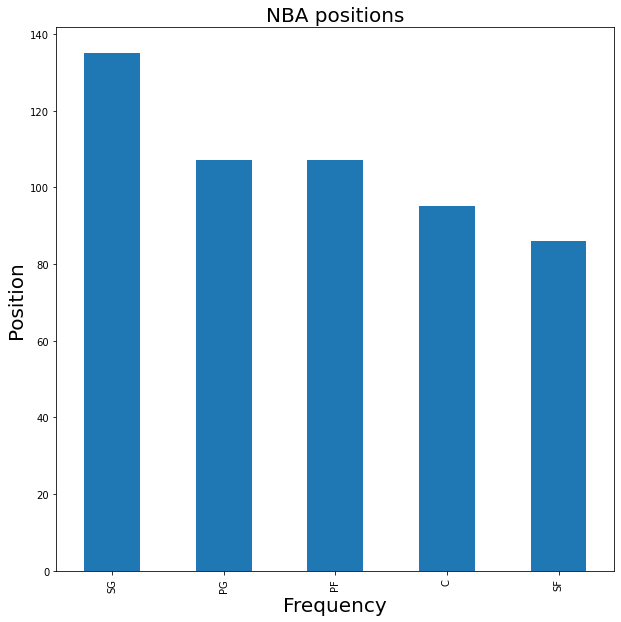

In [16]:
pos = NBA.Pos.value_counts()
plt.subplots(figsize=(10, 10))
pos.plot(kind="bar")
plt.title("NBA positions", fontsize=20 )
plt.xlabel("Frequency", fontsize =20)
plt.ylabel("Position", fontsize=20 )

In [17]:
for x in [x for x in NBA.columns.values if x not in ["Player", "G", "MP", "Pos", "3P%", "2P%", "FT%", "FG%", "eFG%"]]:
    NBA[x] = NBA[x]/NBA["MP"]

In [18]:
NBA.describe()

,G,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,...,STL,BLK,TOV,PF,PTS,3P%,2P%,FT%,FG%,eFG%
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,...,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,57.284906,1298.788679,0.154447,0.349445,0.041669,0.126529,0.112779,0.222915,0.062338,0.085013,...,0.031503,0.020024,0.052540,0.093216,0.412901,0.290279,0.491182,0.696771,0.439919,0.834618
std,35.407644,1051.133834,0.066636,0.111823,0.031308,0.084985,0.068961,0.109564,0.042405,0.054207,...,0.021052,0.020825,0.028753,0.041697,0.161563,0.149377,0.123924,0.214882,0.111814,0.163158
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,359.750000,0.120455,0.280456,0.018440,0.075461,0.069978,0.151091,0.033588,0.048913,...,0.021249,0.006711,0.035316,0.068950,0.323163,0.256824,0.453396,0.651580,0.402209,0.780730
50%,60.000000,1174.000000,0.147179,0.333874,0.042946,0.129738,0.102885,0.214913,0.056115,0.075772,...,0.029262,0.014380,0.048714,0.087582,0.398168,0.331550,0.500000,0.750000,0.438788,0.854026
75%,77.000000,2056.250000,0.187364,0.406053,0.059982,0.178306,0.148404,0.288225,0.083848,0.112659,...,0.038296,0.025641,0.064918,0.112943,0.495295,0.367566,0.552796,0.818182,0.489598,0.924928
max,164.000000,5694.000000,1.000000,1.000000,0.250000,1.000000,1.000000,1.000000,0.333333,0.363636,...,0.250000,0.166667,0.250000,0.461538,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
NBA.drop(columns = ["Player", "G", "MP"], inplace = True)

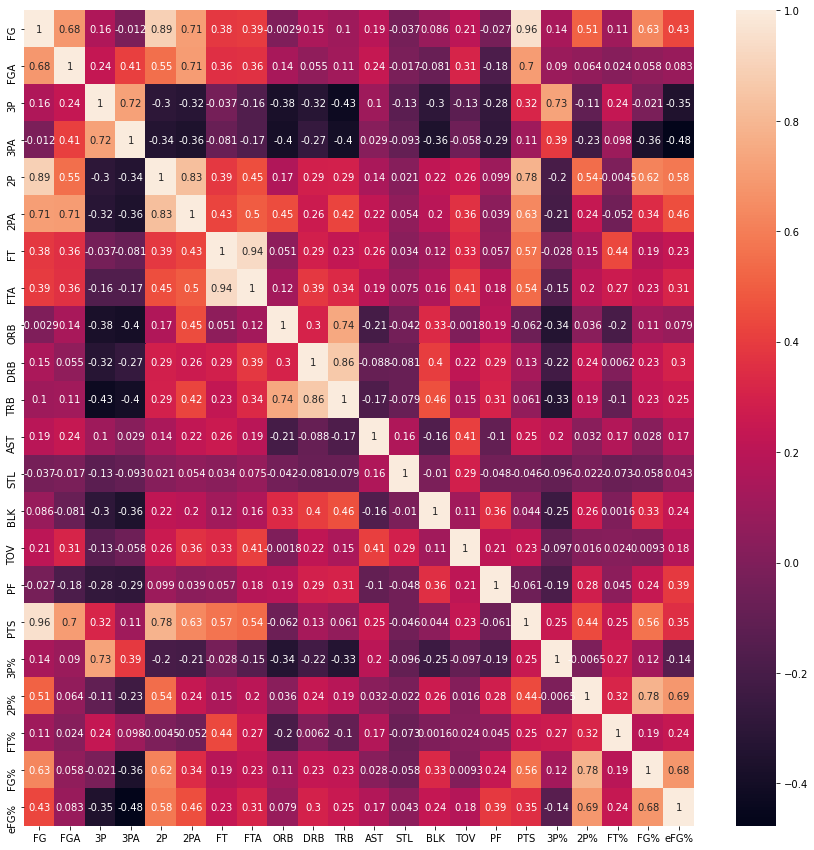

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

corrMatrix = NBA.corr()
f, (ax) = plt.subplots(figsize=(15,15))
sns.heatmap(corrMatrix, annot=True, ax=ax)
plt.show()


In [21]:
NBA.drop(columns = ["FG", "FGA", "FG%", "FTA", "2PA", "3PA"], inplace = True)

We then want to extract the data that we will actually perform the classifier on. This means seperating it out into our X and Y values.

In [22]:
X = NBA.drop(columns = ["Pos"])
y = NBA.Pos

Which we then seperate into out train and test values for by y and x. We do this to ensure that the algorithm is not overfitting and see how it performs on unseen data.

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

## Dummy Classifier

In using the Random Forest Classifier we want to be able to test this against a baseline and we can do that by creating a dummy classifier. This dummy classifier makes decision based on simple decision rules, which in this case appears to be simply put all players into a shooting guard position, and thus has a relatively low accuracy of 0.28. This is our benchmark for going forward and analysing the results


In [24]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics


dc = DummyClassifier(strategy='most_frequent')
dc.fit(X_train,y_train) 
dc_preds = dc.predict(X_test)
print (metrics.classification_report(y_test, dc_preds))

              precision    recall  f1-score   support

           C       0.00      0.00      0.00        25
          PF       0.00      0.00      0.00        24
          PG       0.00      0.00      0.00        27
          SF       0.00      0.00      0.00        20
          SG       0.28      1.00      0.44        37

    accuracy                           0.28       133
   macro avg       0.06      0.20      0.09       133
weighted avg       0.08      0.28      0.12       133



C:\Users\phili\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest Classifier

The random forest classifier algorithm creates many trees instead of just one to understand the dataset. This means that it is an ensemble method such that the final prediction of the random forest are made by averaging the predictions of each individual tree and thus follows the logic of the performance of the crowd is better than the performance of the individual. These individual trees are also based on randomly selected subsets of the data as well rather than the whole dataset.

This does so by taking advantage of:

1. Random Sampling of training datapoints when building trees
    - Each tree lerns from a random sample of the data points. These random smaples are drawn without replacement, known as bootstrapping
    - The idea if that by training each tree on different samples, although each tree might have high variance with resepct to a particular set of the training data, overall the entire forest will have lower variance, but not at the cost of increasing bias
    - When testing, predictions are made by avcearging the predictions of each decision tree
    

2. Random subsets of features considered when splitting nodes
    -  only a subset of all the features are considered for splitting each node in each decision tree

This requires you to specify `n_estimators` which specifies how many trees should be considered in the construction of the whole forest. The more trees chosen, the longer this will take

The benefit of this is that it injects some randomness into the fitting of trees to reduce overfitting that can be seen as part of decision trees, and hence produces and overall better model.

The first thing we want to do is to import the RandomForestClassifier algorithm, which is taken from the sklearn.ensemble module as seen below. We can then assign that Random Forest Classifier to a variable which we can latter call to apply to the data.


In [25]:
#import the classifier
from sklearn.ensemble import RandomForestClassifier

#attach the classifier to a variable
clf = RandomForestClassifier()


While this may be simply applied to our data using `.fit(x,y)` we can influence how it perfroms by using some of its parameters, similar to how we used `max_depth` in the Decision Tree Classifier workshop. 

The potential parameters include:
`n_estimators,
criterion,
max_features,
max_depth,
min_samples_split,
min_samples_leaf,
min_weight_leaf,
min_weight_fraction_leaf,
max_leaf_nodes,
min_impurity_decrease,
bootstrap,
oob_score,
n_jobs,
random_state,
verbose,
warm_start,
class_weight`

But for our purpose we will focuse on `n_estimators` and `max_depth`. `n_estimators` is the number of trees that you want to generate, which in this case we will generate 100 decision trees, and `max_depth` which as in the previous workshop, will limit the potential of overfitting of each individual tree, allow us to visualise the results and reduce computational complexity. 

We also set `oob_score` to true as we want to calculate the out of bag score which is used essentially for cross-sampling so we can more clearly see how it performs on the test data


More information on each parameter can be found [here](https://medium.com/@taplapinger/tuning-a-random-forest-classifier-1b252d1dde92) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

For our purposes we can stick with the default criterion for spliting as <b>gini</b> for gini impurity, but this can also be changed to 'entropy' if you wanted to see how the model performs. 


In [26]:
clf = RandomForestClassifier(n_estimators =100, oob_score=True, max_depth =3)


clf.fit(X_train, y_train)
test_pred_random_forest = clf.predict(X_test)
    

In [27]:
y_test.value_counts()

SG    37
PG    27
C     25
PF    24
SF    20
Name: Pos, dtype: int64

In [28]:

# get the confusion matrix
confusion_matrix2 = metrics.confusion_matrix(y_test, test_pred_random_forest)
confusion_matrix2

array([[21,  4,  0,  0,  0],
       [ 5, 17,  1,  0,  1],
       [ 3,  0, 18,  0,  6],
       [ 1,  8,  0,  1, 10],
       [ 0,  2,  7,  3, 25]], dtype=int64)

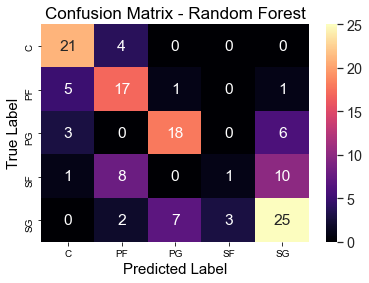

<Figure size 864x864 with 0 Axes>

In [29]:
matrix2_df = pd.DataFrame(confusion_matrix2)

# set axis to add title and axis labels later
ax = plt.axes()
sns.set(font_scale=1.3) # for label size
plt.figure(figsize=(12,12))

plot = sns.heatmap(matrix2_df, annot=True, fmt='g', ax=ax, cmap = "magma") #fmt so that numbers aren't scientific

#axis labels and title
ax.set_title('Confusion Matrix - Random Forest', fontsize = 17)
ax.set_xlabel('Predicted Label', fontsize = 15)
ax.set_ylabel('True Label'     , fontsize = 15)

# change tick labels from 0-4 to 1-5
labels = ("C", "PF", "PG", "SF", "SG")
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show()


fig = plot.get_figure()


In [30]:
import numpy as np
a = np.array(y_test.unique())
a = a.astype('<U10')
a

array(['SG', 'PF', 'SF', 'PG', 'C'], dtype='<U10')

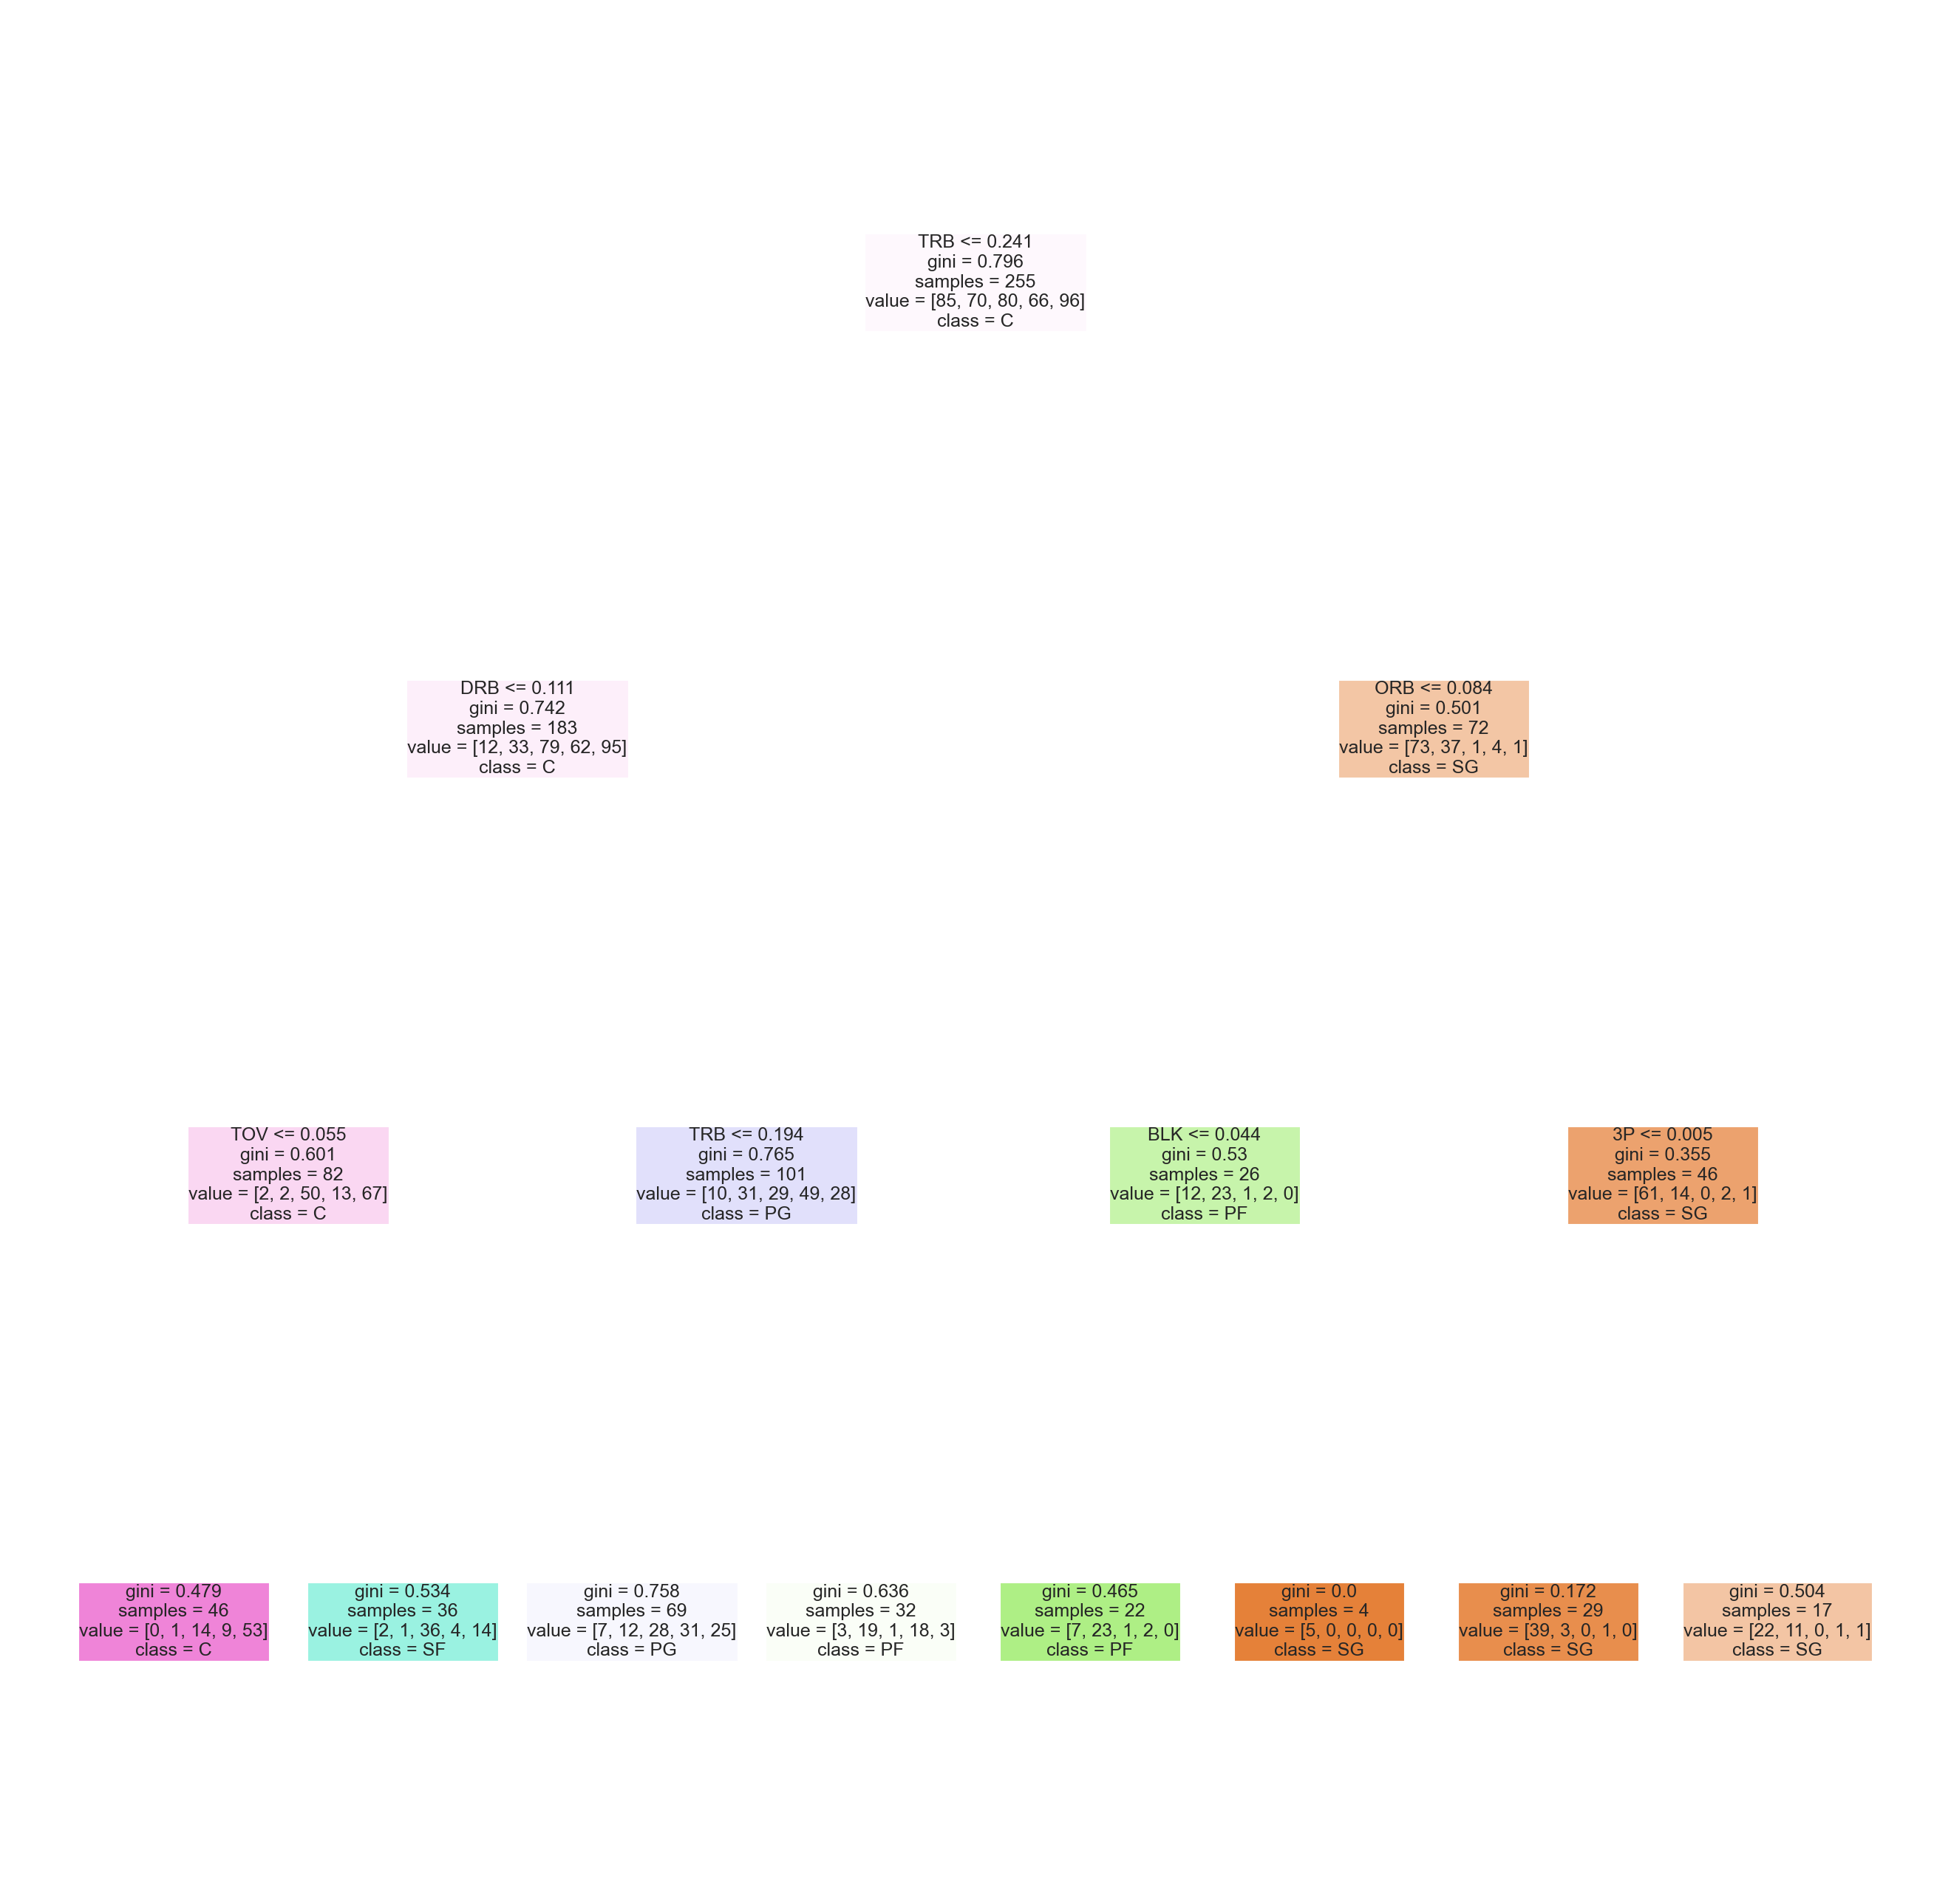

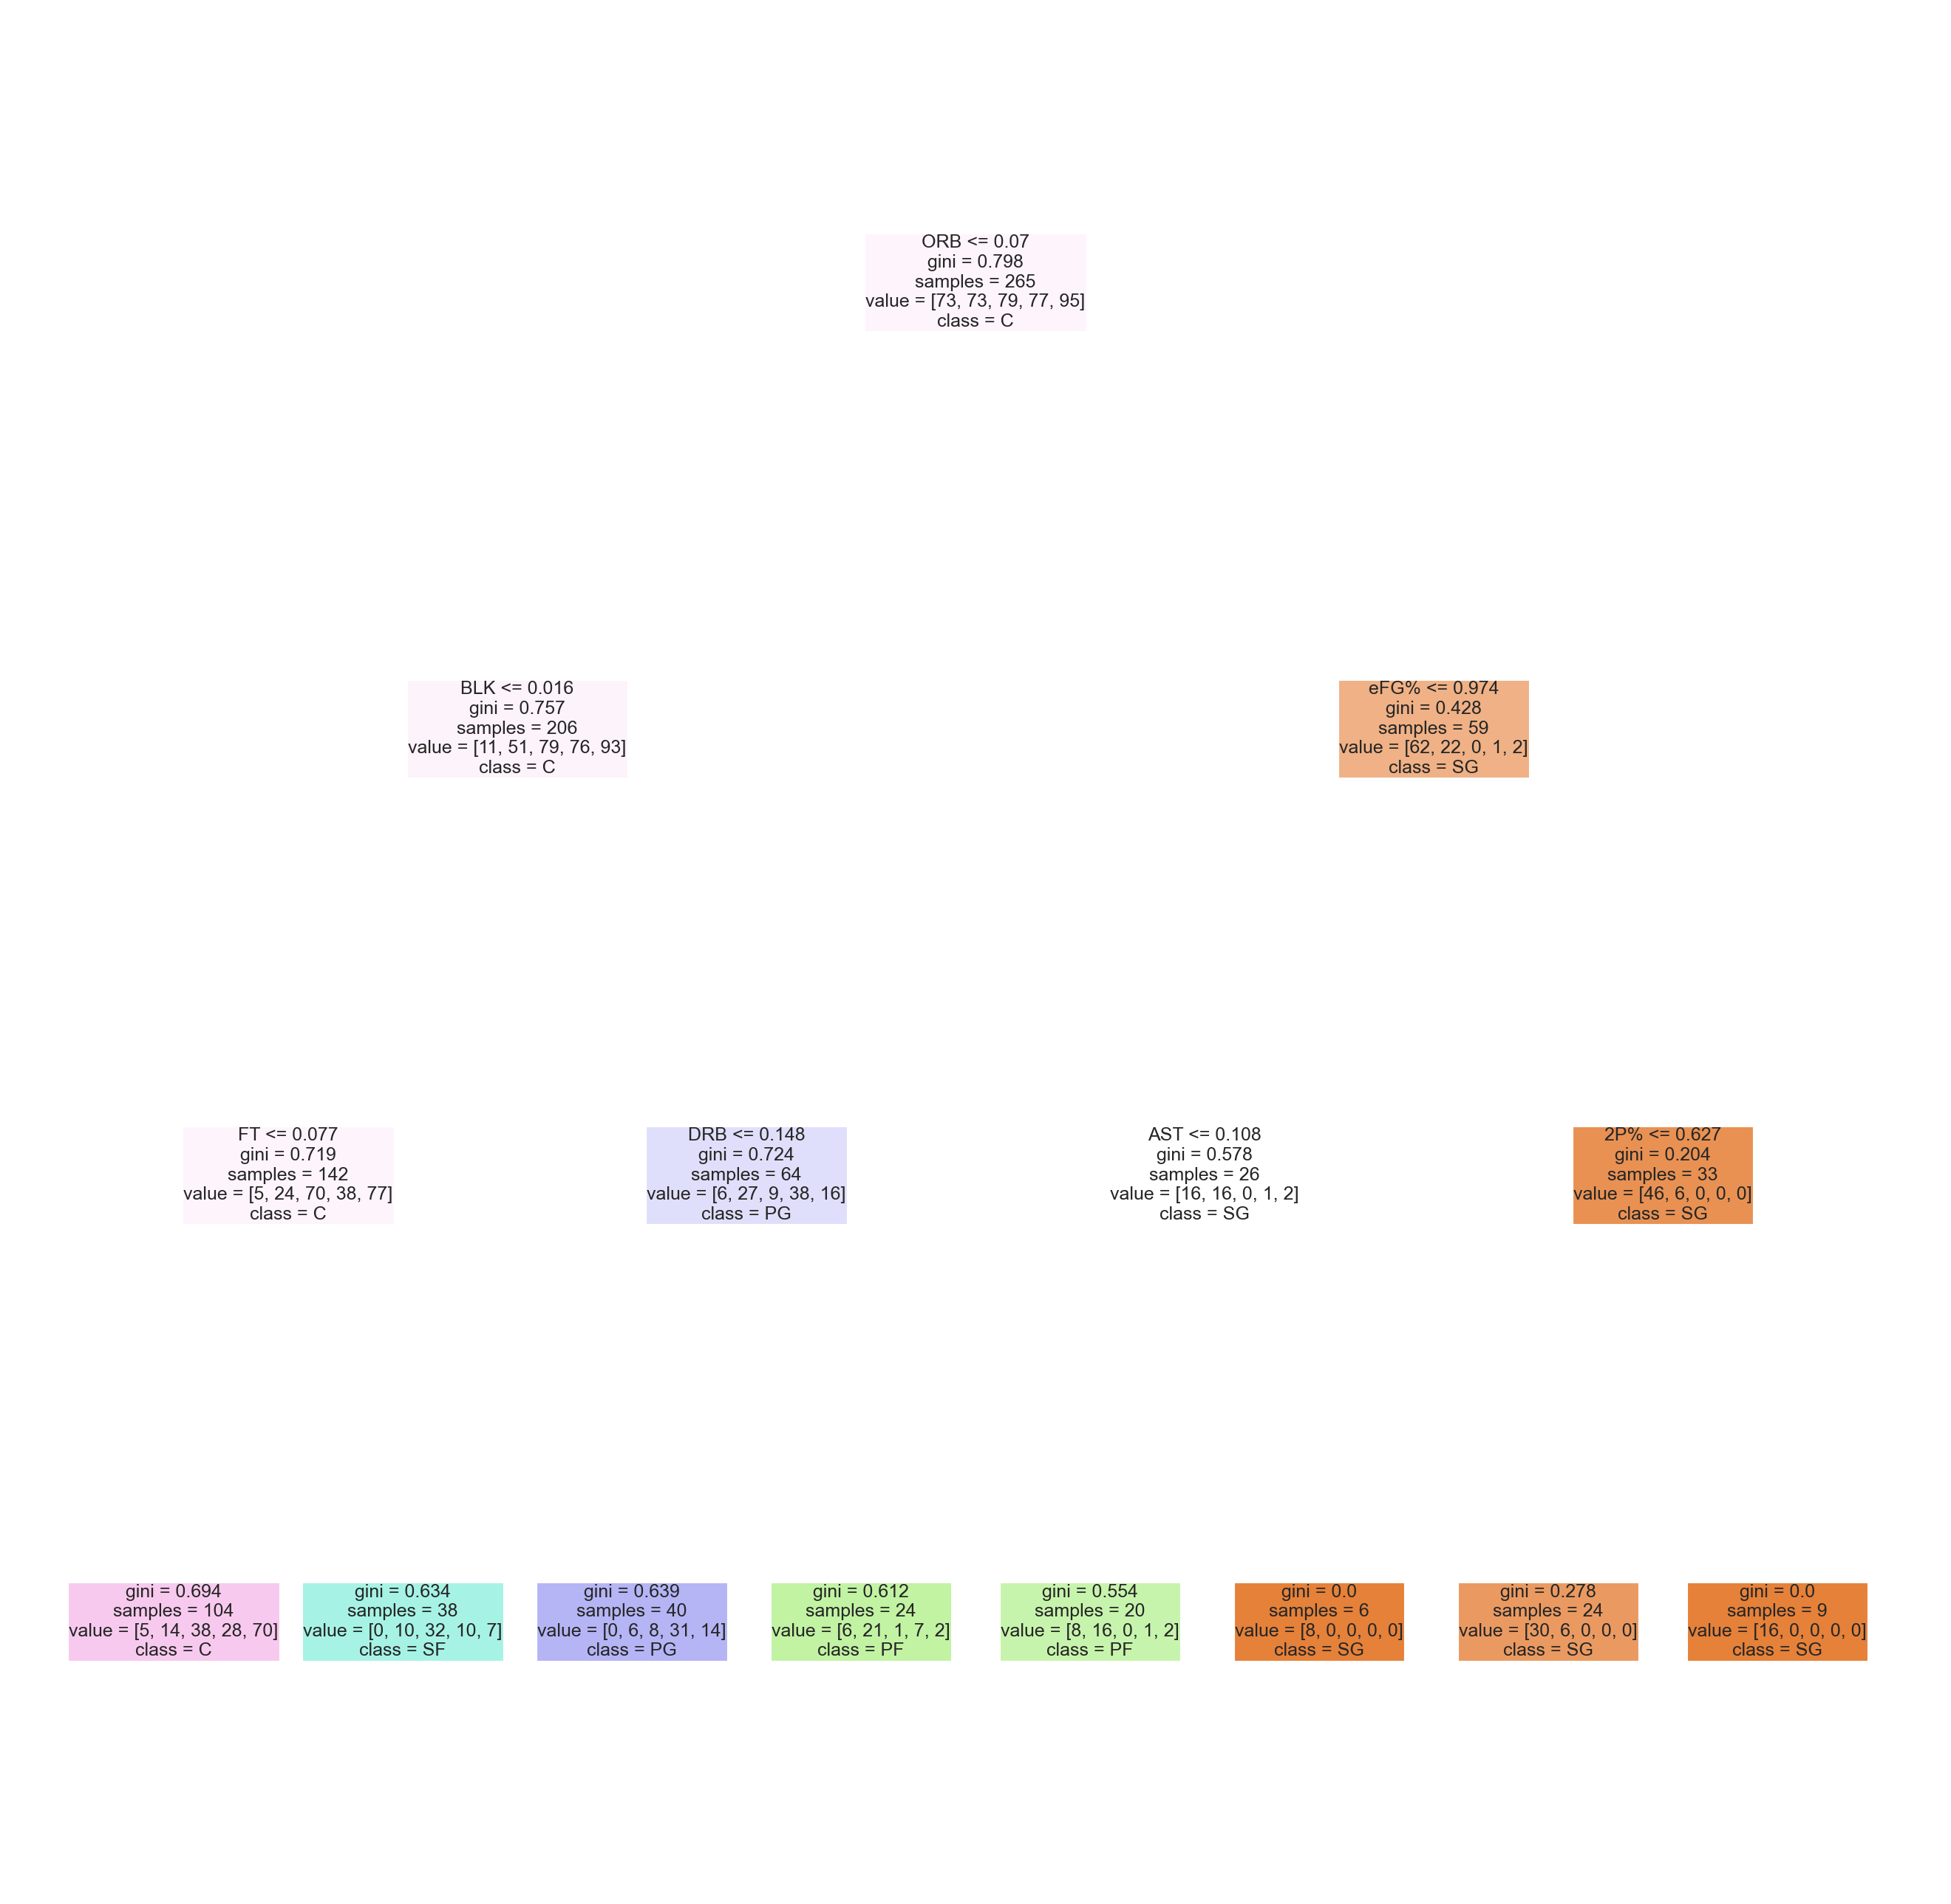

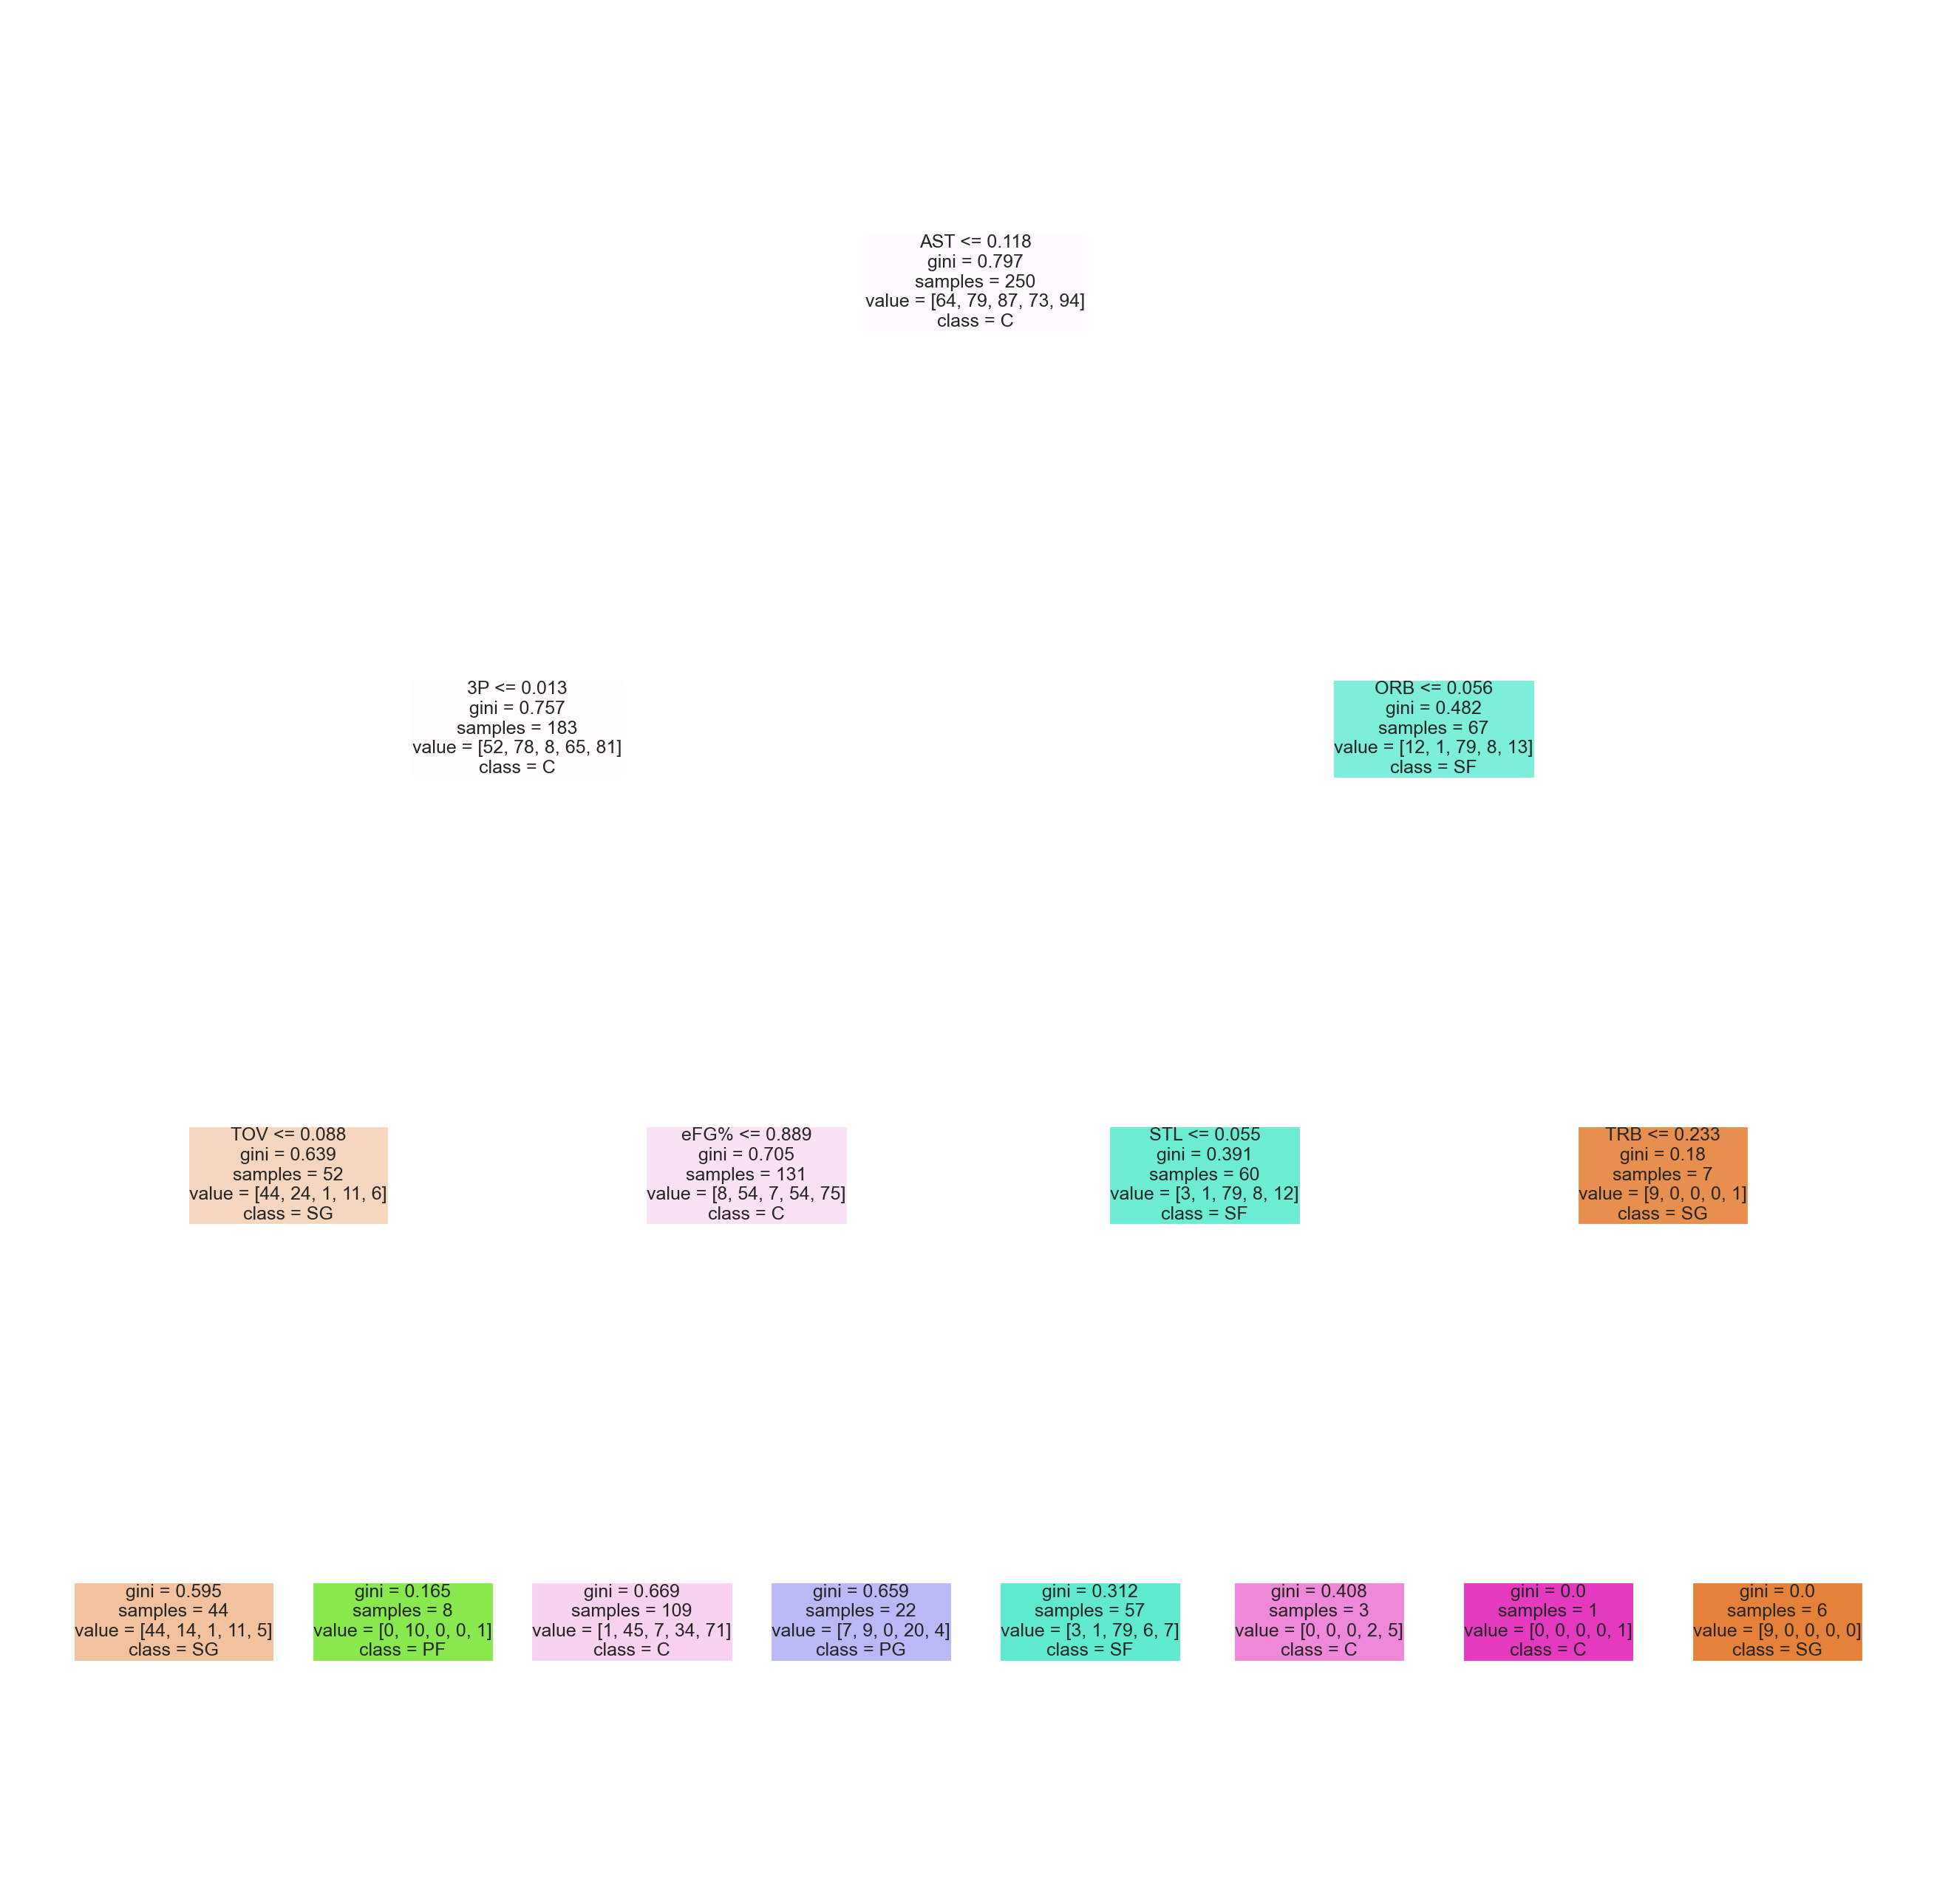

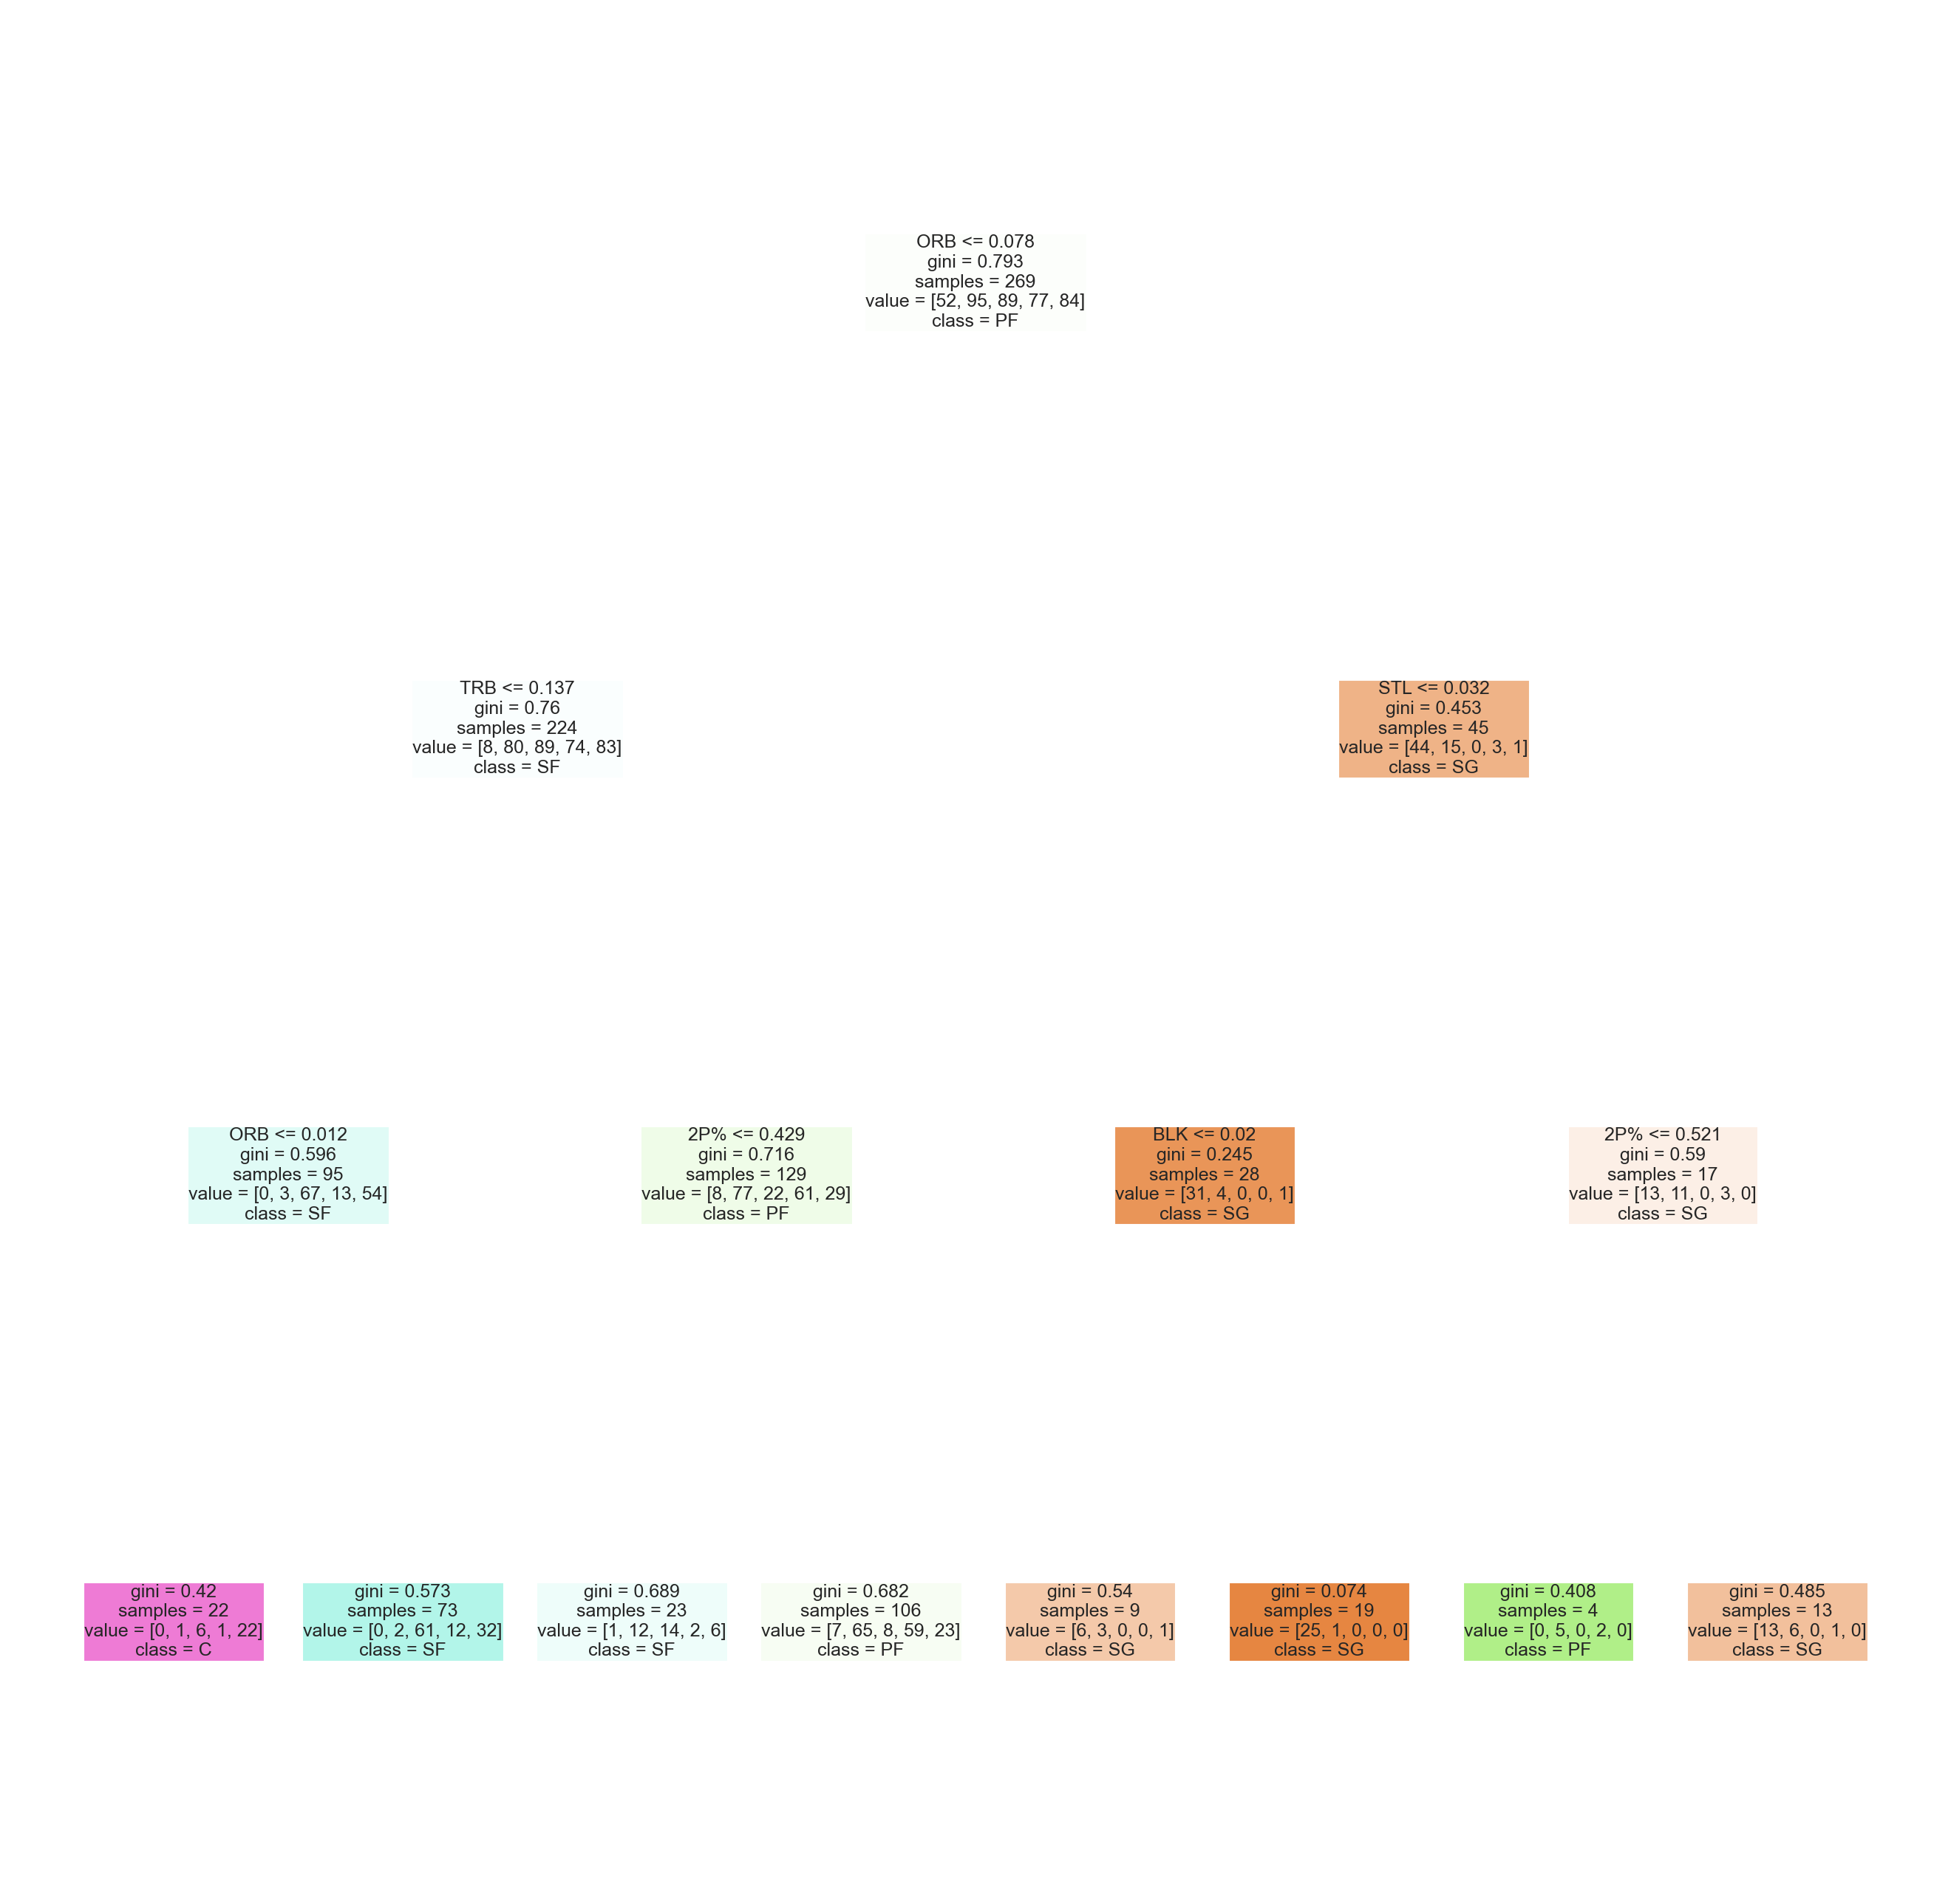

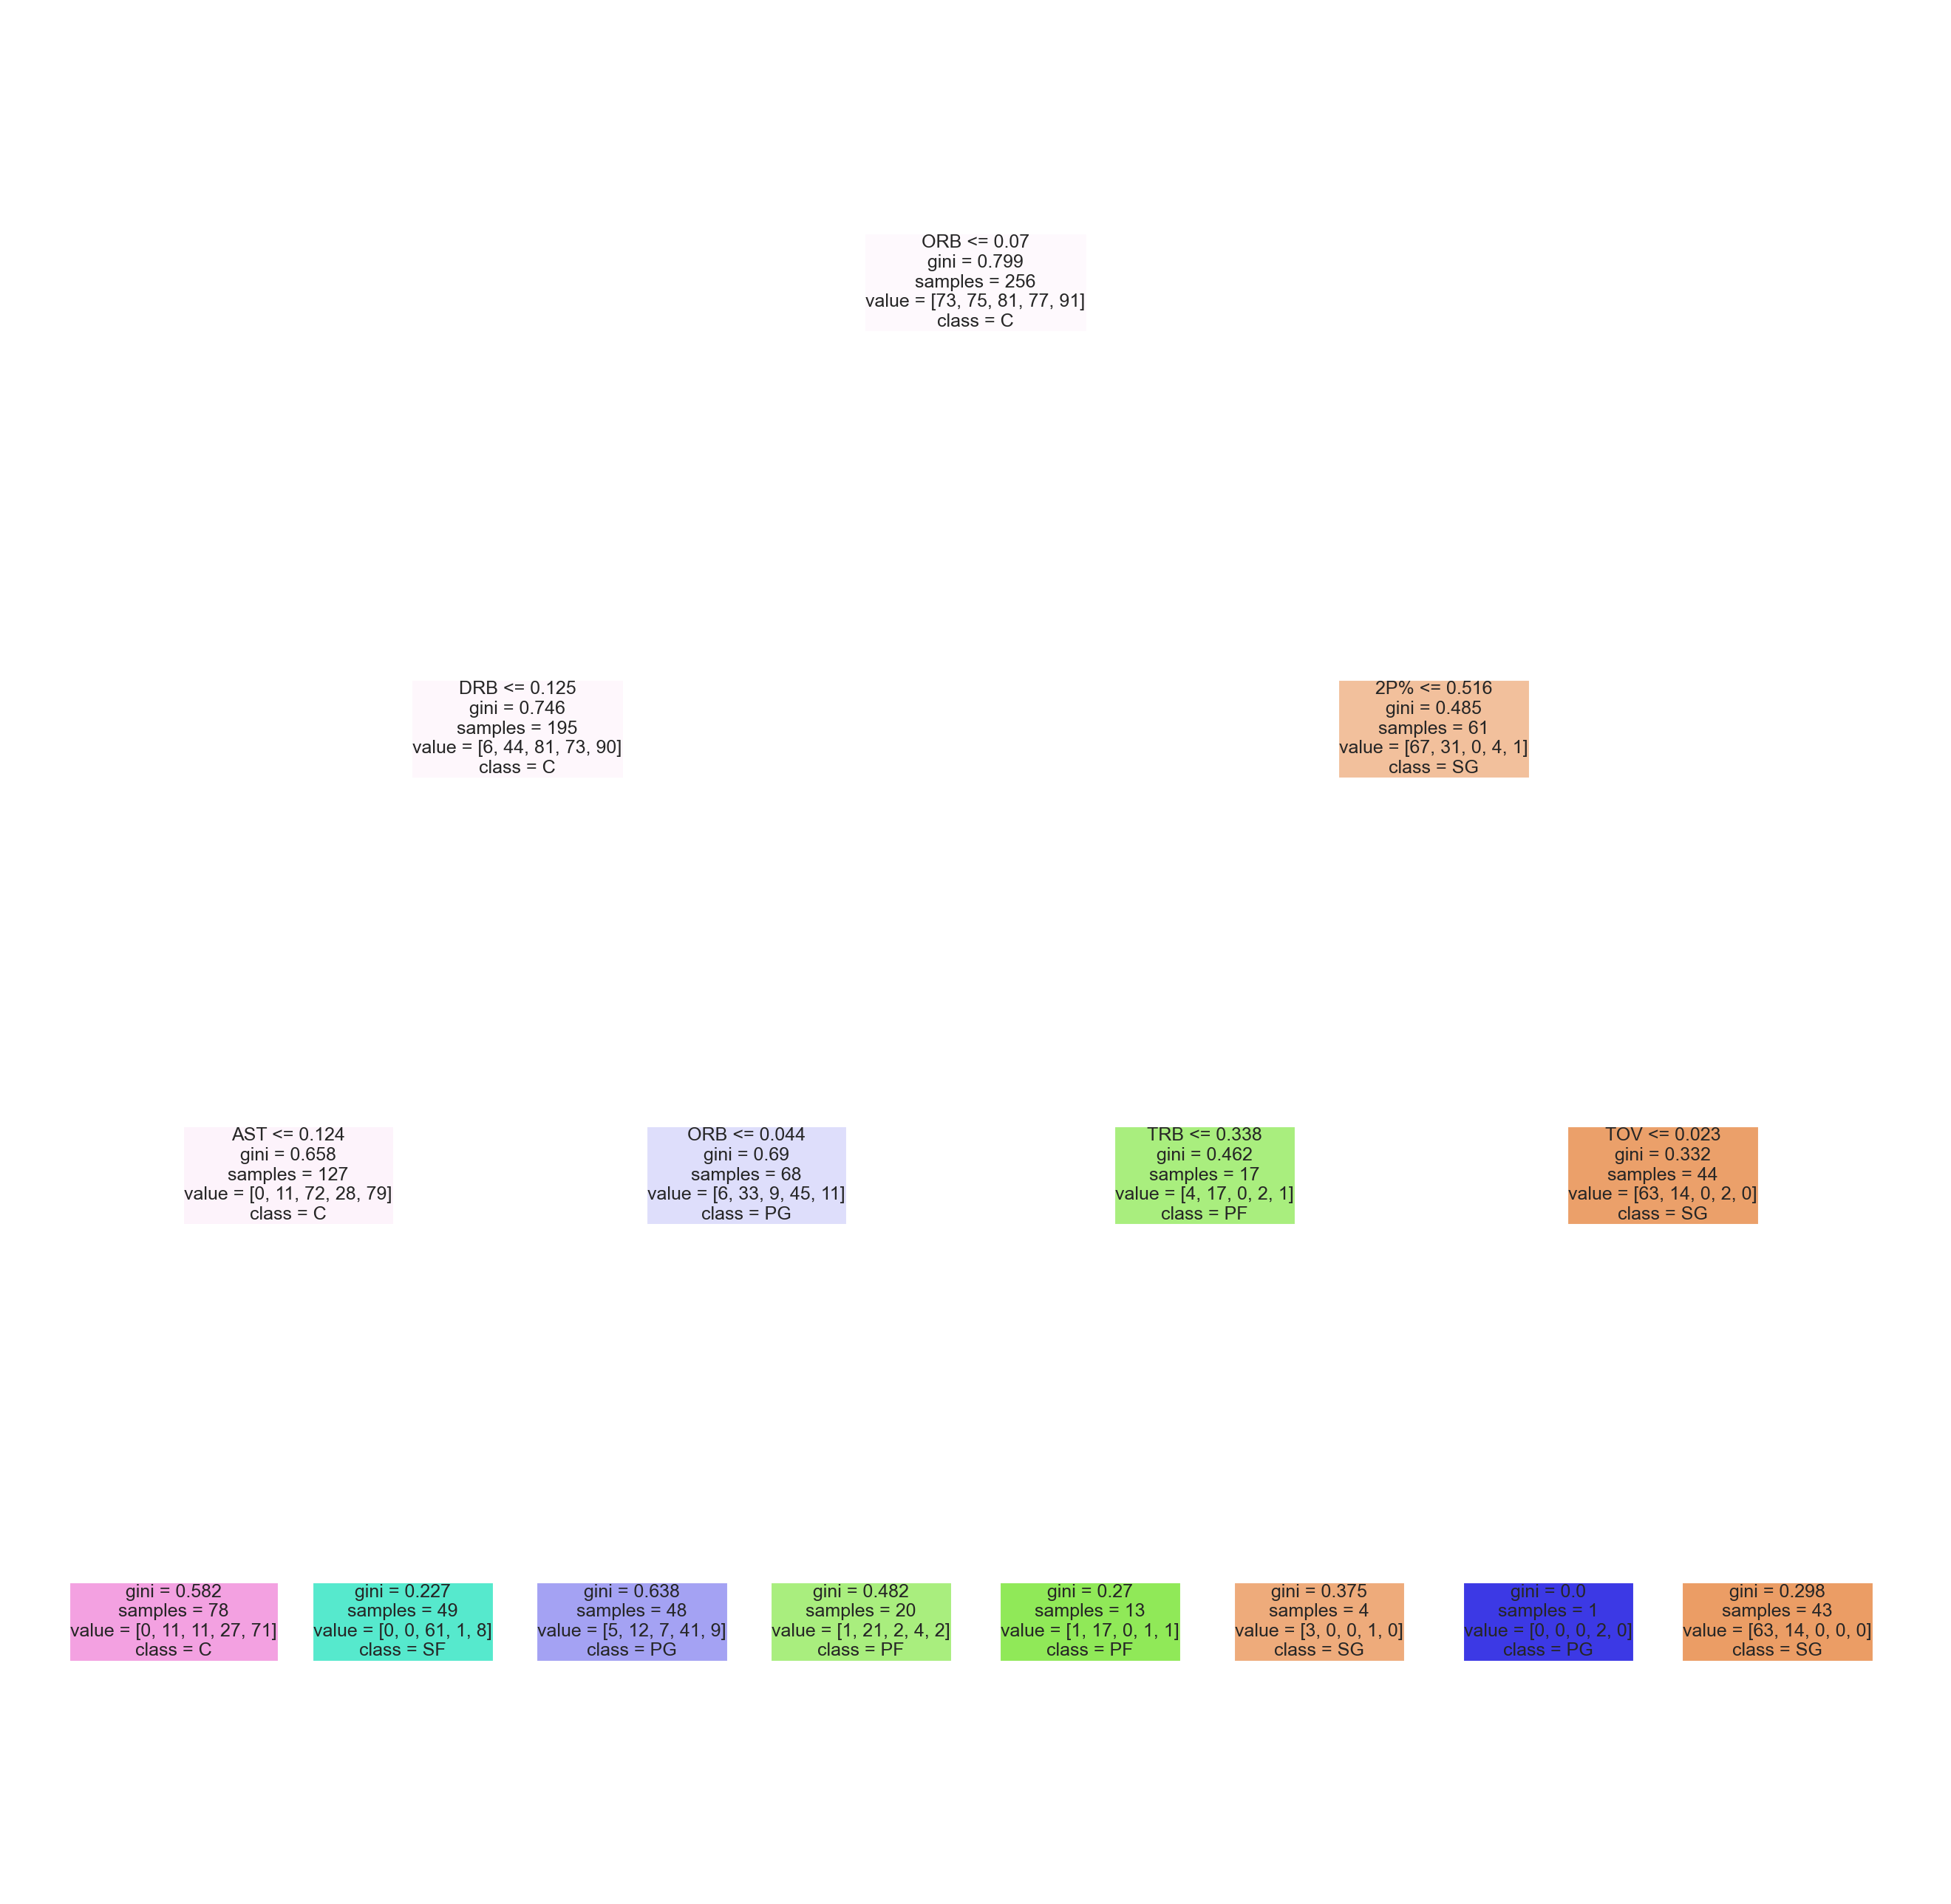

In [31]:
from sklearn import tree


for x in range (45, 50):
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
    tree.plot_tree(clf.estimators_[x],
                   feature_names = X.columns, 
                   class_names = a,
                   filled = True);

Different metrics can be used to see how a Random Forest Classifier performs, with these being the same as for the Decision Tree classifier. Instead of going through them all individually again, we can print out the entire metric as one. For information on each of these please see [here](https://towardsdatascience.com/introduction-to-decision-tree-classifiers-from-scikit-learn-32cd5d23f4d) 

In [32]:
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
oob_score = clf.oob_score_

print(f"The training score of the random forest classifier is : {train_accuracy:.3f}")
print(f"The out of basket score is: {oob_score:.3f}")
print(f"The test score of the random forest classifier is {test_accuracy:.3f}")

The training score of the random forest classifier is : 0.693
The out of basket score is: 0.627
The test score of the random forest classifier is 0.617


In [33]:
from sklearn import metrics

print (metrics.classification_report(y_test, test_pred_random_forest))

              precision    recall  f1-score   support

           C       0.70      0.84      0.76        25
          PF       0.55      0.71      0.62        24
          PG       0.69      0.67      0.68        27
          SF       0.25      0.05      0.08        20
          SG       0.60      0.68      0.63        37

    accuracy                           0.62       133
   macro avg       0.56      0.59      0.56       133
weighted avg       0.57      0.62      0.58       133



We can compare this to a DummyClassifier which uses simple rules in order to make predictions. This can be used as a simple baseline to compare with real classifiers. (here)[https://towardsdatascience.com/build-your-first-random-forest-classifier-cbc63a956158]

## Feature importance

What is good about the Random Forest Classifier, as compared to a single Decision Tree is that we can examine the feature importance more closely. This is because when creating an individual Decision Tree then the algorithm may focus quite heavily on one part of the data than another in that particular instance and thus this would have high importance. However, when running multiple decision trees we can more clearly identify which features are more important. 

The importance of that feature is determined by the depth of that feature in respect to the predictability of the trget variables. Features that are at the top of the tree contribute to the final decision on a large number of input samples. By creating multiple trees, we can use the average predictive ability of the features in order to reduce variance that would be associated with feature importance if we were using an individual tree.

From this understanding, we can remove features that are not important and re-run the models again or just use this information to understand which features are important for our model. 

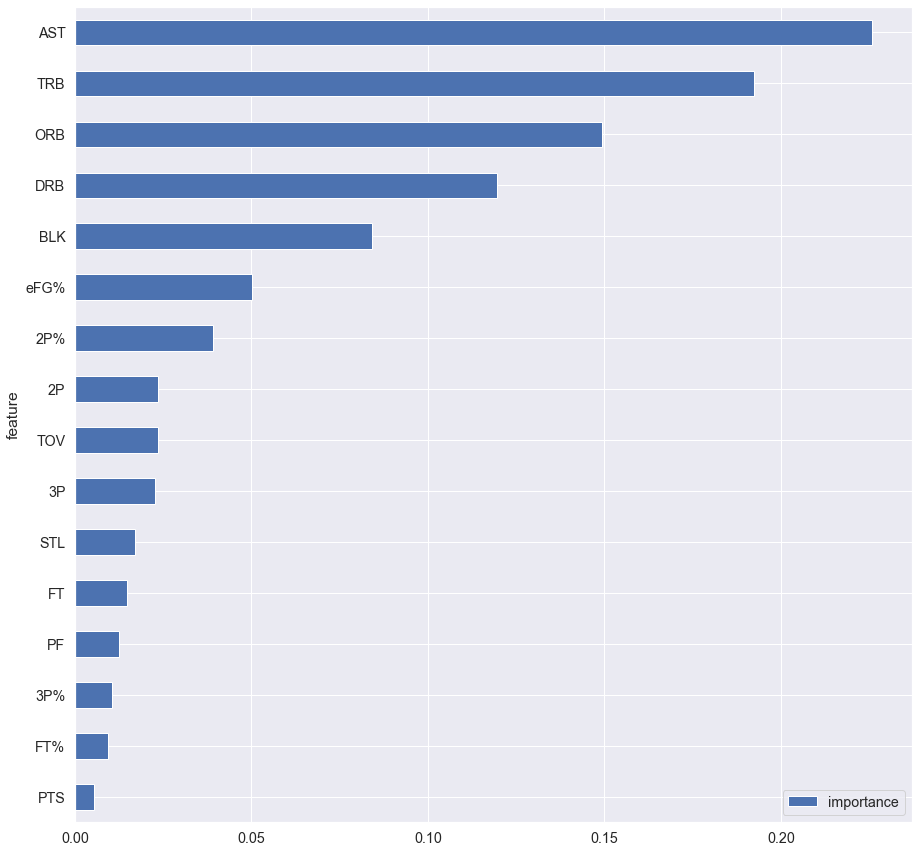

In [34]:
#print(clf.feature_importances_)
fi = pd.DataFrame({'feature': list(X.columns),
                  'importance': clf.feature_importances_}).\
                    sort_values('importance', ascending=True)

plot = fi.plot.barh(x = 'feature', y = 'importance', figsize=(15,15))

fig = plot.get_figure()
#fig.savefig("Plots/feature_importance_rf.png", bbox_inches='tight')

Our results here show that 6 features are highly informative while the remaining 11 are less so. We could make the decision here to remove these uninformative features and rerun it again, or we can keep them. Usually you would have a threshold for removing features from the model such as 1% or we could even generate a random feature for which if actual features perform worse than this we can remove them.

We can extract features that have less than a given importance using the following code:

In [35]:
fi[fi.importance <= 0.01]

,feature,importance
11,PTS,0.005458
14,FT%,0.009460


## Permutation importance

Another method of looking at the importance of features is by using random re-shuffling to see how each individual rpedict influences model approaches. This does so by training the baseline model, recording the score (in this case the r^2 score). Then reshuffle the values from one feature in the dataset and rerun the predictions. The feature importance here is the difference between the becnhmark score and the modified score, thus the higher the value the more important the feature is for the model. 

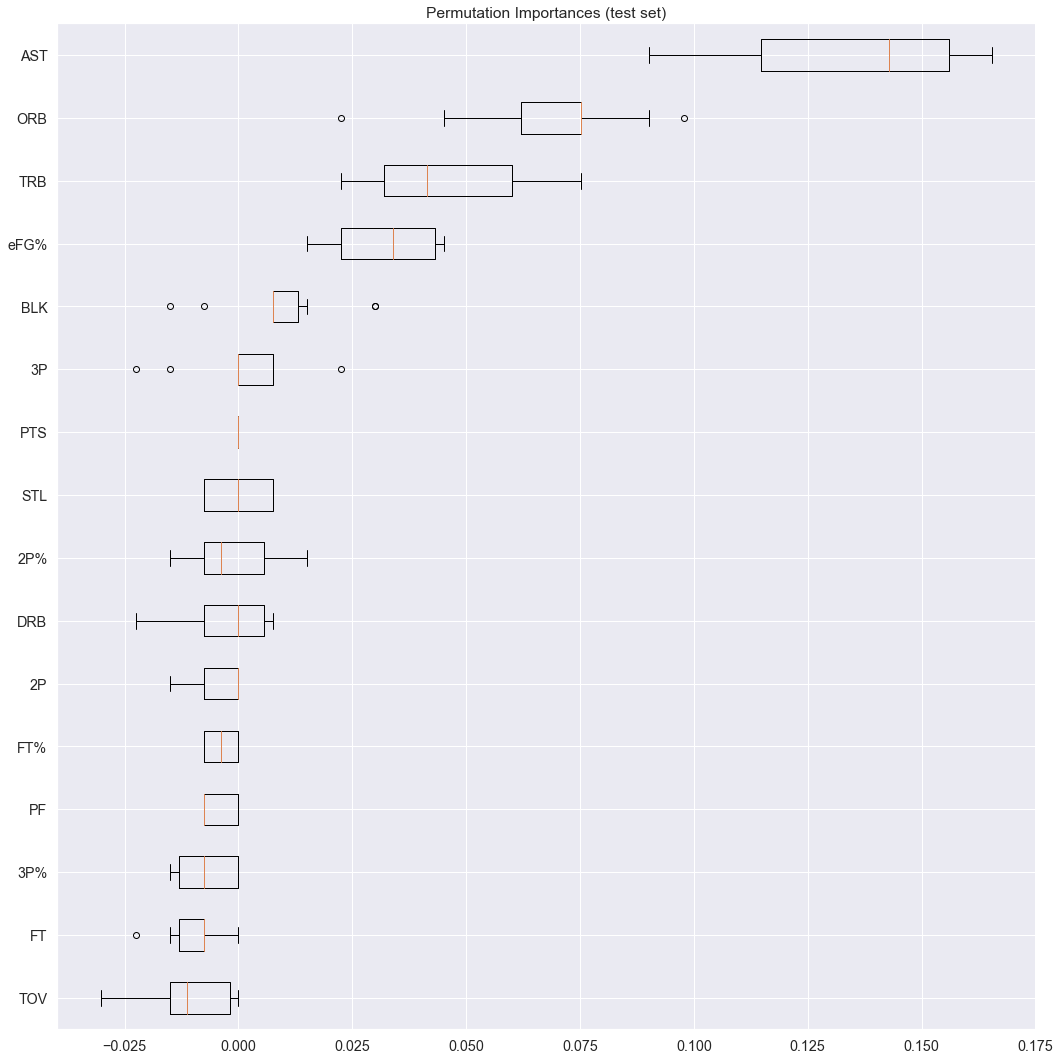

In [36]:

from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance


result = permutation_importance(clf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(15,15))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

From this we can similar results to the feature importance results. It shows that essentially free throws attempted, steals, free throws and points add nothing to the analysis and in the case of free throws attempted evern make the results worse. 

Based on this therefore we can create a decision rule to drop certain data from the model to ensure that it is not overfitting and potentially increase the accuracy on the test set. For this, we will take the results from the feature importance results and drop any results that have an importance of less than 2% as follows, rerunning the analysis and seeing how it performs.

In [59]:
UIC =[]
for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] <= 0:
        UIC.append(X.columns.values[i])
    
print(UIC)

['PTS', 'STL', '2P%', 'DRB', '2P', 'FT%', 'PF', '3P%', 'FT', 'TOV']


In [37]:
#extracting unimportant features
UIF = list(fi[fi.importance <= 0.02].feature)

X_trainIF = X_train.drop(columns = UIF)
X_testIF = X_test.drop(columns = UIF)

clf.fit(X_trainIF, y_train)
test_pred_random_forest_IF = clf.predict(X_testIF)

train_accuracy = clf.score(X_trainIF, y_train)
test_accuracy = clf.score(X_testIF, y_test)
oob_score = clf.oob_score_

print(f"The training score of the random forest classifier is : {train_accuracy:.3f}")
print(f"The out of basket score is: {oob_score:.3f}")
print(f"The test score of the random forest classifier is {test_accuracy:.3f}")

print (metrics.classification_report(y_test, test_pred_random_forest_IF))


The training score of the random forest classifier is : 0.688
The out of basket score is: 0.620
The test score of the random forest classifier is 0.632
              precision    recall  f1-score   support

           C       0.75      0.84      0.79        25
          PF       0.50      0.75      0.60        24
          PG       0.69      0.67      0.68        27
          SF       0.67      0.10      0.17        20
          SG       0.62      0.68      0.65        37

    accuracy                           0.63       133
   macro avg       0.65      0.61      0.58       133
weighted avg       0.65      0.63      0.60       133



In [ ]:
X_trainIF_perm = X_train.drop(columns = UIC)
X_testIF_perm = X_test.drop(columns = UIC)

clf.fit(X_trainIF_perm, y_train)
test_pred_random_forest_IF = clf.predict(X_testIF_perm)

train_accuracy = clf.score(X_trainIF_perm, y_train)
test_accuracy = clf.score(X_testIF_perm, y_test)
oob_score = clf.oob_score_

print(f"The training score of the random forest classifier is : {train_accuracy:.3f}")
print(f"The out of basket score is: {oob_score:.3f}")
print(f"The test score of the random forest classifier is {test_accuracy:.3f}")

print (metrics.classification_report(y_test, test_pred_random_forest_IF))


# Tune the hyperparameters

So now that we have the model, we can see that the accuracy isn't that high and that several 

In [47]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'max_depth': [4,5,6,7,8], 
                     'min_samples_split': [1,3,5,7,9]}]

scores = ['accuracy']

for score in scores:
    
    print()
    print(f"Tuning hyperparameters for {score}")
    print()
    
    clf = GridSearchCV(
        RandomForestClassifier(), tuned_parameters,
        scoring = f'{score}'
    )
    clf.fit(X_trainIF, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")


Tuning hyperparameters for accuracy



C:\Users\phili\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\phili\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\phili\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\phili\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\phili\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\phili\anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\phili\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\phili\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\phili\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\phili\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\phili\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\phili\anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\phili\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\phili\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\phili\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\phili\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\phili\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\phili\anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\phili\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\phili\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\phili\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\phili\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\phili\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\phili\anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\phili\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\phili\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\phili\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\phili\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\phili\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\phili\anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

Best parameters set found on development set:

{'max_depth': 6, 'min_samples_split': 7}

Grid scores on development set:
nan (+/-nan) for {'max_depth': 4, 'min_samples_split': 1}
0.620 (+/-0.031) for {'max_depth': 4, 'min_samples_split': 3}
0.635 (+/-0.029) for {'max_depth': 4, 'min_samples_split': 5}
0.622 (+/-0.031) for {'max_depth': 4, 'min_samples_split': 7}
0.630 (+/-0.037) for {'max_depth': 4, 'min_samples_split': 9}
nan (+/-nan) for {'max_depth': 5, 'min_samples_split': 1}
0.627 (+/-0.043) for {'max_depth': 5, 'min_samples_split': 3}
0.622 (+/-0.032) for {'max_depth': 5, 'min_samples_split': 5}
0.622 (+/-0.036) for {'max_depth': 5, 'min_samples_split': 7}
0.632 (+/-0.039) for {'max_depth': 5, 'min_samples_split': 9}
nan (+/-nan) for {'max_depth': 6, 'min_samples_split': 1}
0.630 (+/-0.030) for {'max_depth': 6, 'min_samples_split': 3}
0.625 (+/-0.021) for {'max_depth': 6, 'min_samples_split': 5}
0.637 (+/-0.018) for {'max_depth': 6, 'min_samples_split': 7}
0.630 (+/-0.032) for {'

In [39]:

sorted(metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [51]:
clf = RandomForestClassifier(n_estimators =100, oob_score=True, max_depth =6, min_samples_split = 7)


clf.fit(X_trainIF, y_train)
test_pred_random_forest = clf.predict(X_testIF)



In [52]:
train_accuracy = clf.score(X_trainIF, y_train)
test_accuracy = clf.score(X_testIF, y_test)

print(f"The training score of the random forest classifier is : {train_accuracy:.3f}")
print(f"The test score of the random forest classifier is {test_accuracy:.3f}")

The training score of the random forest classifier is : 0.854
The test score of the random forest classifier is 0.624


In [53]:
from sklearn import metrics

print (metrics.classification_report(y_test, test_pred_random_forest))

              precision    recall  f1-score   support

           C       0.80      0.64      0.71        25
          PF       0.47      0.79      0.59        24
          PG       0.71      0.63      0.67        27
          SF       0.57      0.40      0.47        20
          SG       0.66      0.62      0.64        37

    accuracy                           0.62       133
   macro avg       0.64      0.62      0.62       133
weighted avg       0.65      0.62      0.62       133

